Requires the dependencies in environment-full.yml and that you have run the Unpack.ipynb.

# Imports

In [1]:
from pyiron_atomistics import Project

In [31]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(16,9))

In [3]:
import pyiron_potentialfit

In [17]:
import mpltern
from matplotlib.colors import LogNorm

In [12]:
import numpy as np

In [4]:
pr = Project('./Pyiron')

# Show the Training Data

In [5]:
cont = pr.load('EverythingWithBinary')

## E-V

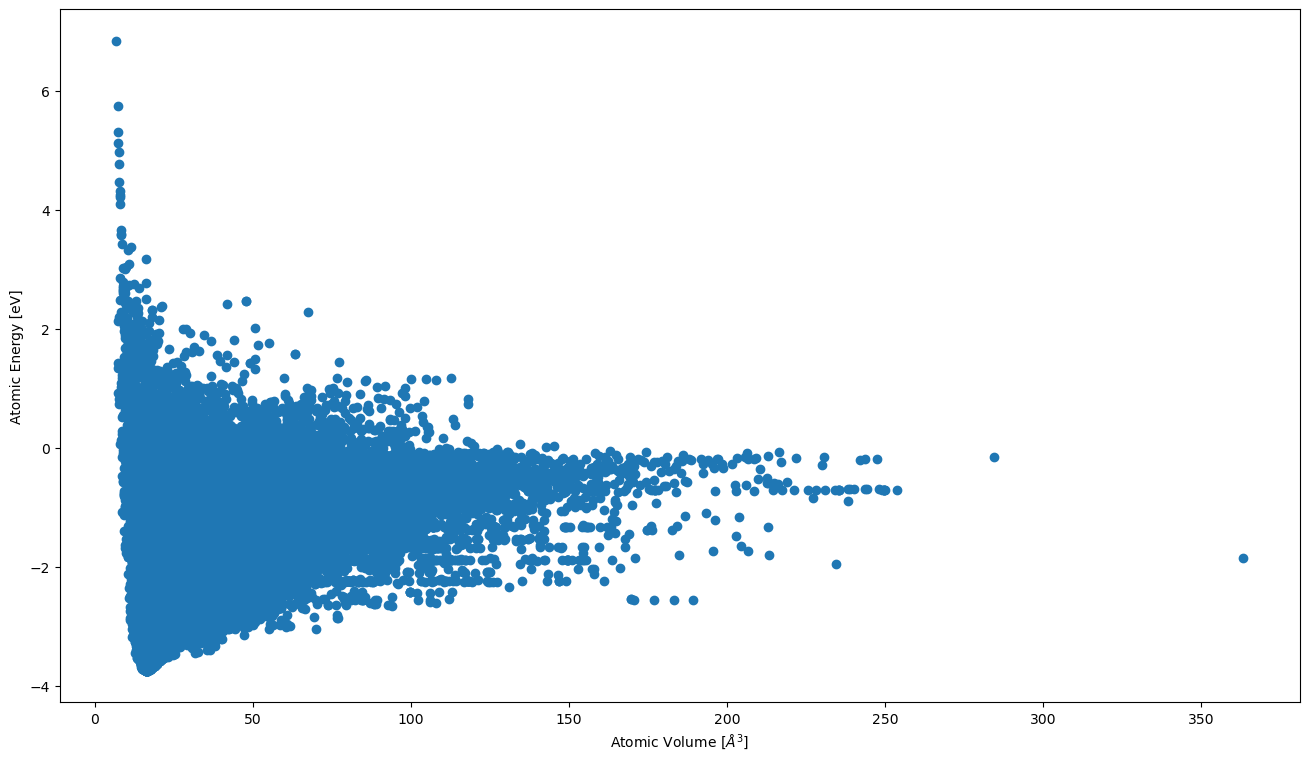

In [32]:
ev = cont.plot.energy_volume();

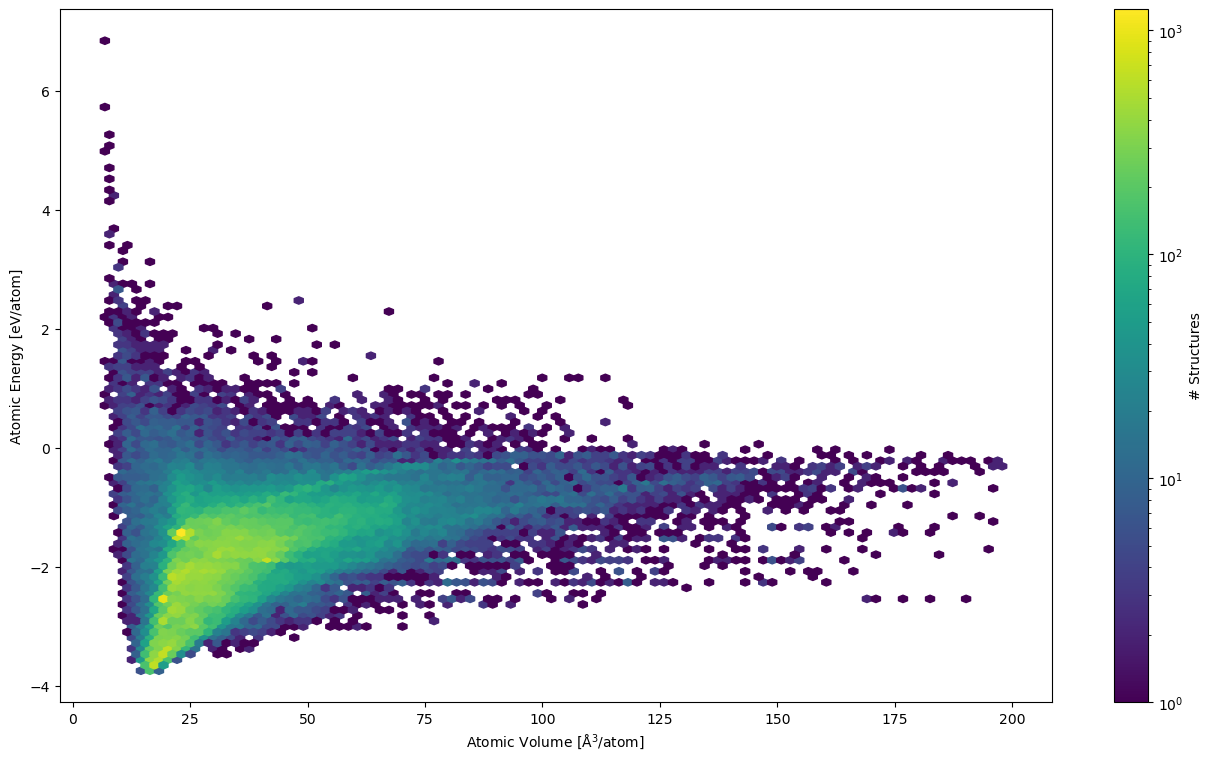

In [33]:
plt.hexbin(
    data=ev.query('V<200'), x='V', y='E',bins='log', 
)
plt.xticks(np.linspace(0, 200, 9))
plt.xlabel('Atomic Volume [$\mathrm{\AA}^3$/atom]')
plt.ylabel('Atomic Energy [eV/atom]')
plt.colorbar(label='# Structures')

## Concentration

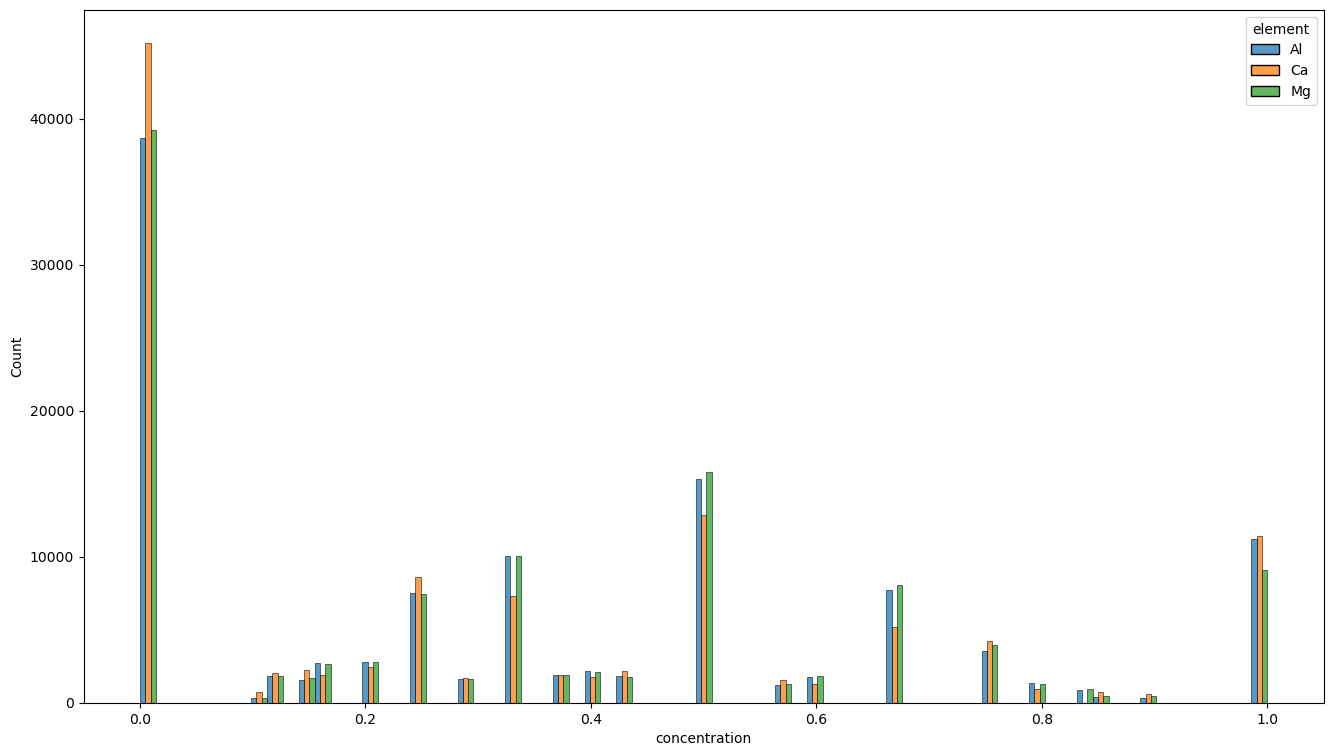

In [34]:
# just to get data frame quickly
cs = cont.plot.concentration();

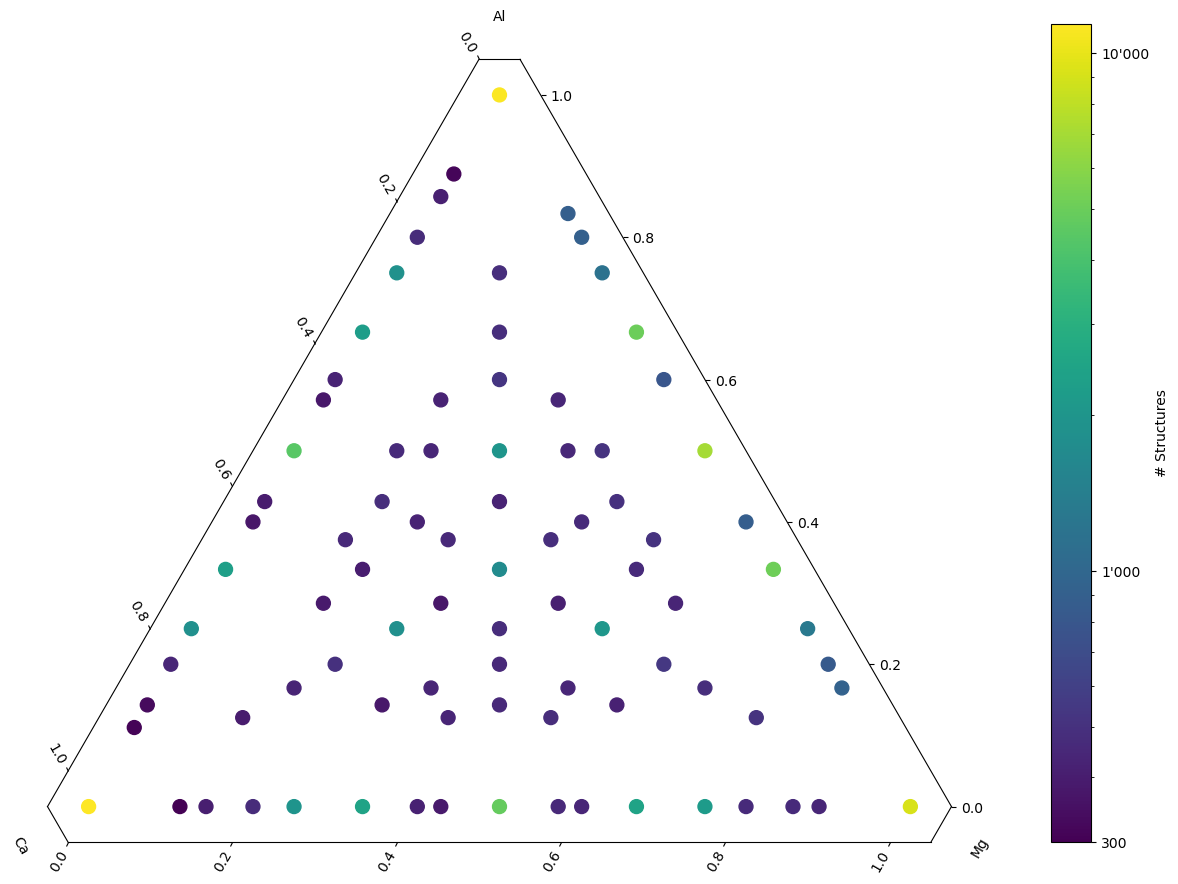

In [35]:
hcs = cs.groupby(['Al','Ca','Mg']).size()
hcs.name = "count"
hcs = hcs.reset_index()

ax = plt.subplot(projection='ternary')

e1, e2, e3 = cont._container.get_elements()
d = ax.scatter(
    hcs[e1], hcs[e2], hcs[e3], c=hcs['count'], 
    s=100,
    norm=LogNorm()
);
cbar = plt.colorbar(d, label="# Structures", ticks=[hcs['count'].min(), 1e3, 1e4])
cbar.set_ticklabels([hcs['count'].min(), '1\'000', '10\'000'])
ax.set_tlabel(e1)
ax.set_llabel(e2)
ax.set_rlabel(e3)
ax.set_ternary_lim(
    -0.05, 1.05,
    -0.05, 1.05,
    -0.05, 1.05,
    fit='triangle'
)
plt.tight_layout()

# Look at Potential Training Metrics

In [21]:
pr['Potentials'].job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,12035,finished,None,MTP16_2d0_6d5_5000,/MTP16_2d0_6d5_5000,None,/home/poul/science/papers/MgAlCa/Supplementary/Pyiron/Potentials/,2023-12-21 12:12:09.743876,None,None,zora@cmti001#160#cm,Mlip,0.1.0,None,None
1,12036,finished,None,MTP16_2d0_8d2_5000,/MTP16_2d0_8d2_5000,None,/home/poul/science/papers/MgAlCa/Supplementary/Pyiron/Potentials/,2023-12-21 12:38:39.524179,None,None,zora@cmti001#160#cm,Mlip,0.1.0,None,None
2,12037,finished,None,MTP08_2d0_6d5_5000,/MTP08_2d0_6d5_5000,None,/home/poul/science/papers/MgAlCa/Supplementary/Pyiron/Potentials/,2023-12-21 12:53:07.738926,None,None,zora@cmti001#160#cm,Mlip,0.1.0,None,None
3,12038,finished,None,MTP08_2d0_8d2_5000,/MTP08_2d0_8d2_5000,None,/home/poul/science/papers/MgAlCa/Supplementary/Pyiron/Potentials/,2023-12-21 13:05:36.829269,None,None,zora@cmti001#160#cm,Mlip,0.1.0,None,None
4,12039,finished,None,MTP22_2d0_8d2_5000,/MTP22_2d0_8d2_5000,None,/home/poul/science/papers/MgAlCa/Supplementary/Pyiron/Potentials/,2024-01-11 18:26:28.904347,None,None,zora@cmti002#160#cm,Mlip,0.1.0,None,None
5,12040,finished,None,MTP24_2d0_8d2_5000,/MTP24_2d0_8d2_5000,None,/home/poul/science/papers/MgAlCa/Supplementary/Pyiron/Potentials/,2024-02-15 22:03:05.778315,None,None,zora@cmti002#320#cmti,Mlip,0.1.0,None,None
6,12041,finished,None,MTP22_2d0_6d5_5000,/MTP22_2d0_6d5_5000,None,/home/poul/science/papers/MgAlCa/Supplementary/Pyiron/Potentials/,2024-02-26 21:45:20.360645,None,None,zora@cmti001#240#cmti,Mlip,0.1.0,None,None
7,12042,finished,None,MTP24_2d0_6d5_5000,/MTP24_2d0_6d5_5000,None,/home/poul/science/papers/MgAlCa/Supplementary/Pyiron/Potentials/,2024-02-27 10:50:41.376506,None,None,zora@cmti001#320#cmti,Mlip,0.1.0,None,None


In [22]:
jpot = pr.load('MTP24_2d0_8d2_5000')

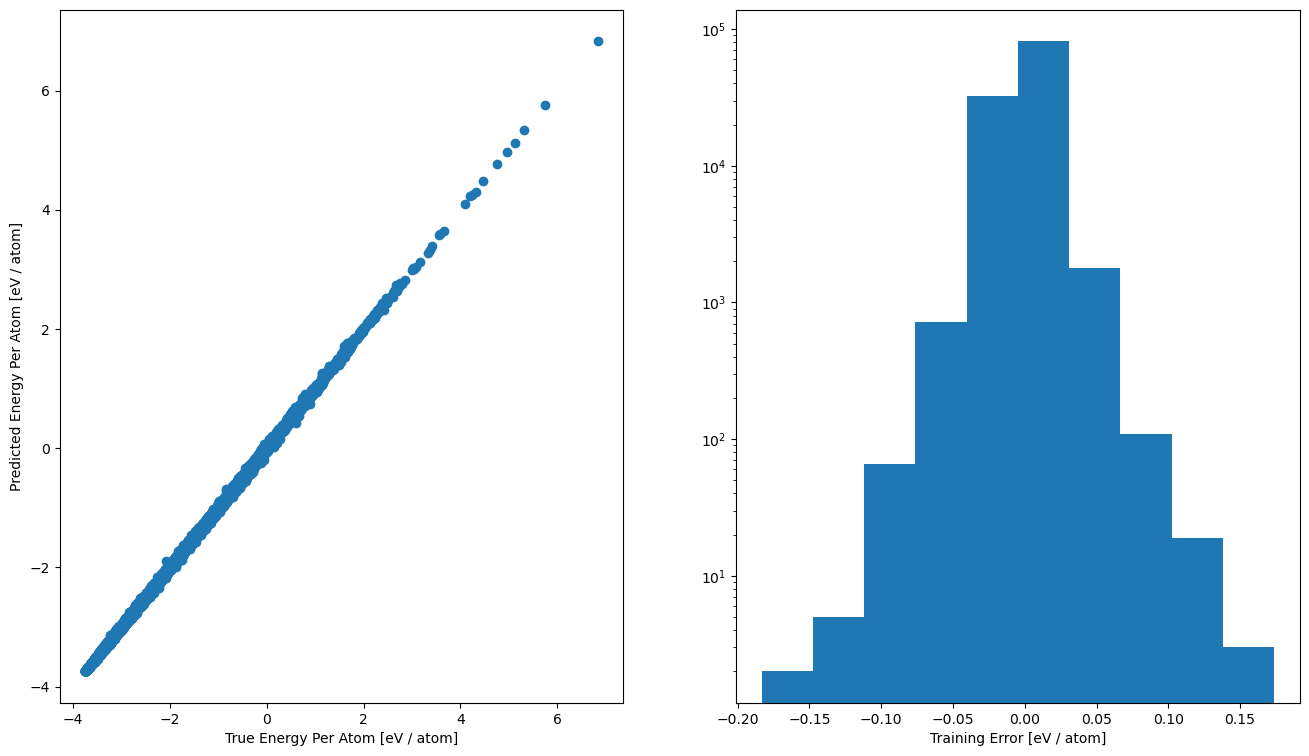

In [36]:
jpot.plot.energy_scatter_histogram(logy=True)

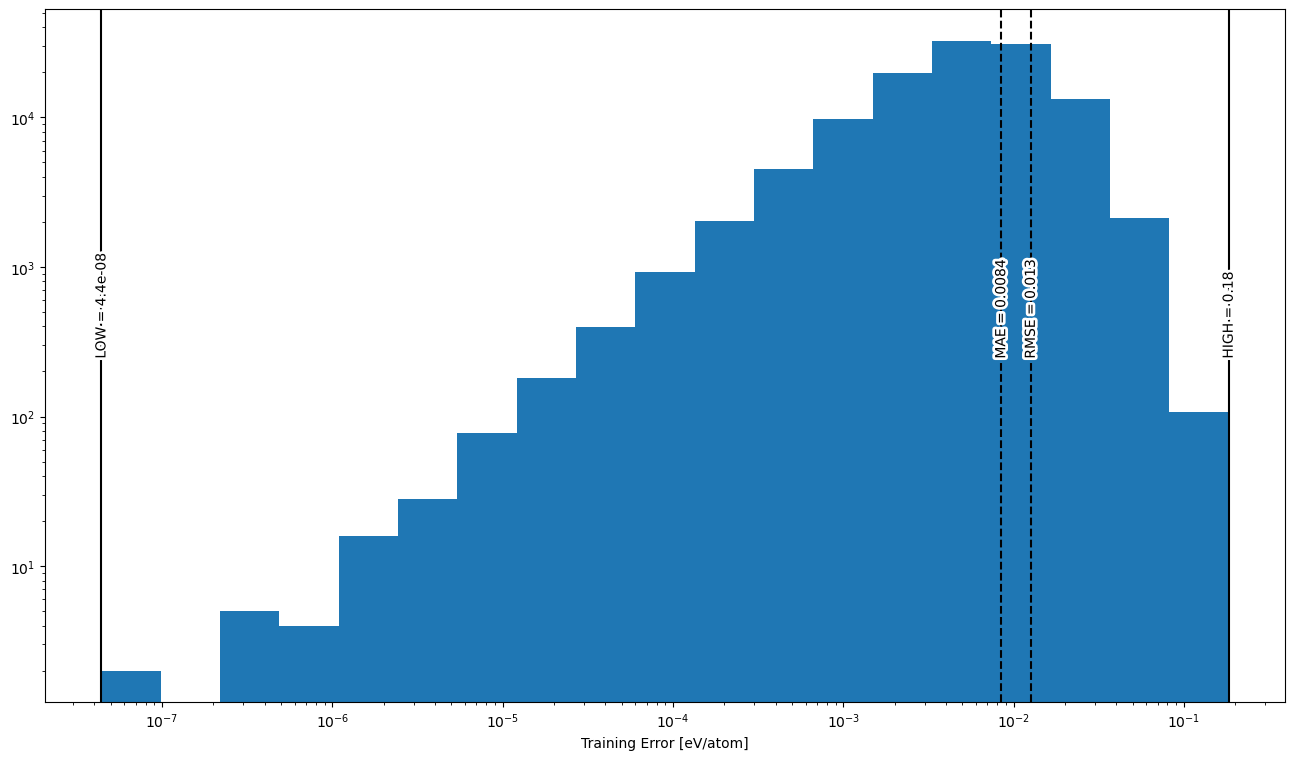

In [37]:
jpot.plot.energy_log_histogram(logy=True)

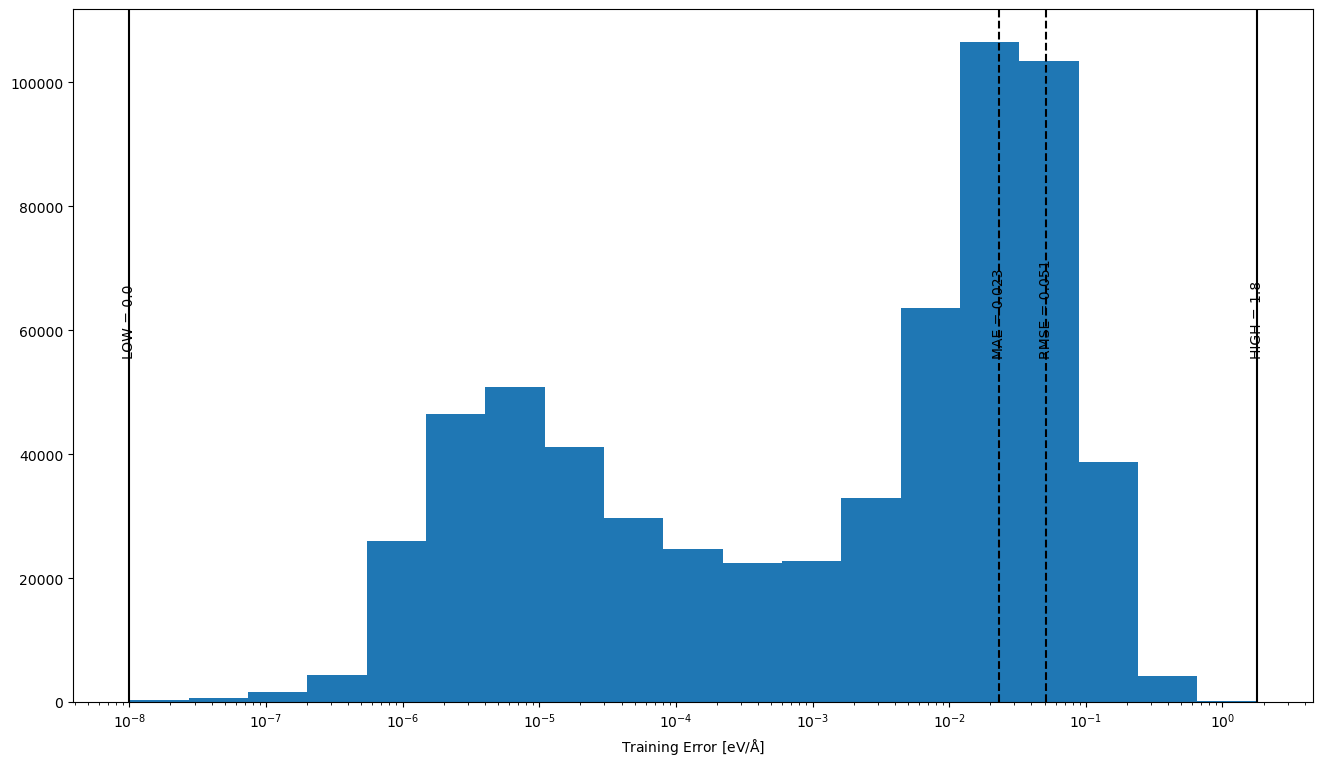

In [70]:
jpot.plot.force_log_histogram()

/home/poul/micromamba/envs/mgalca-full/lib/python3.11/site-packages/pyiron_potentialfit/ml/potentialfit.py:282: RuntimeWarning: invalid value encountered in divide
  force_dir_pred = force_pred[I] / force_norm_pred[I]


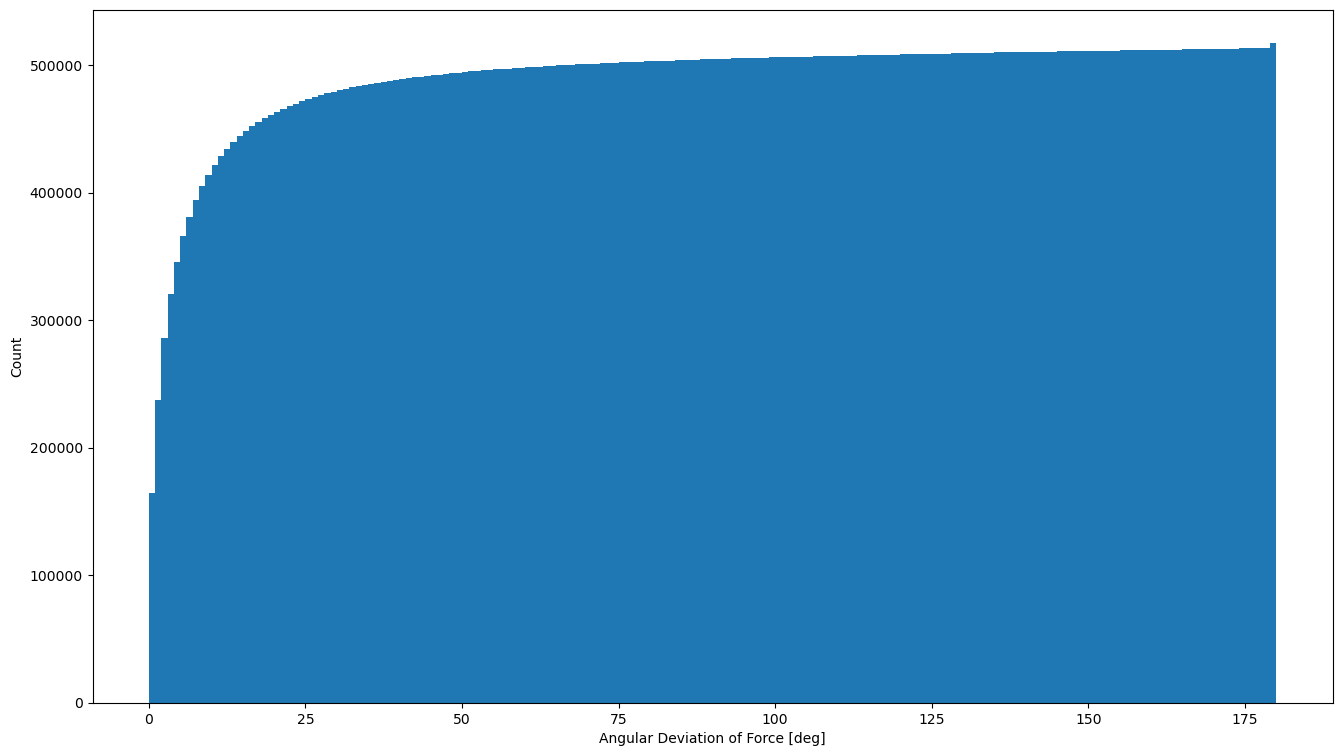

In [123]:
jpot.plot.force_angle_histogram(logy=False, cumulative=True)

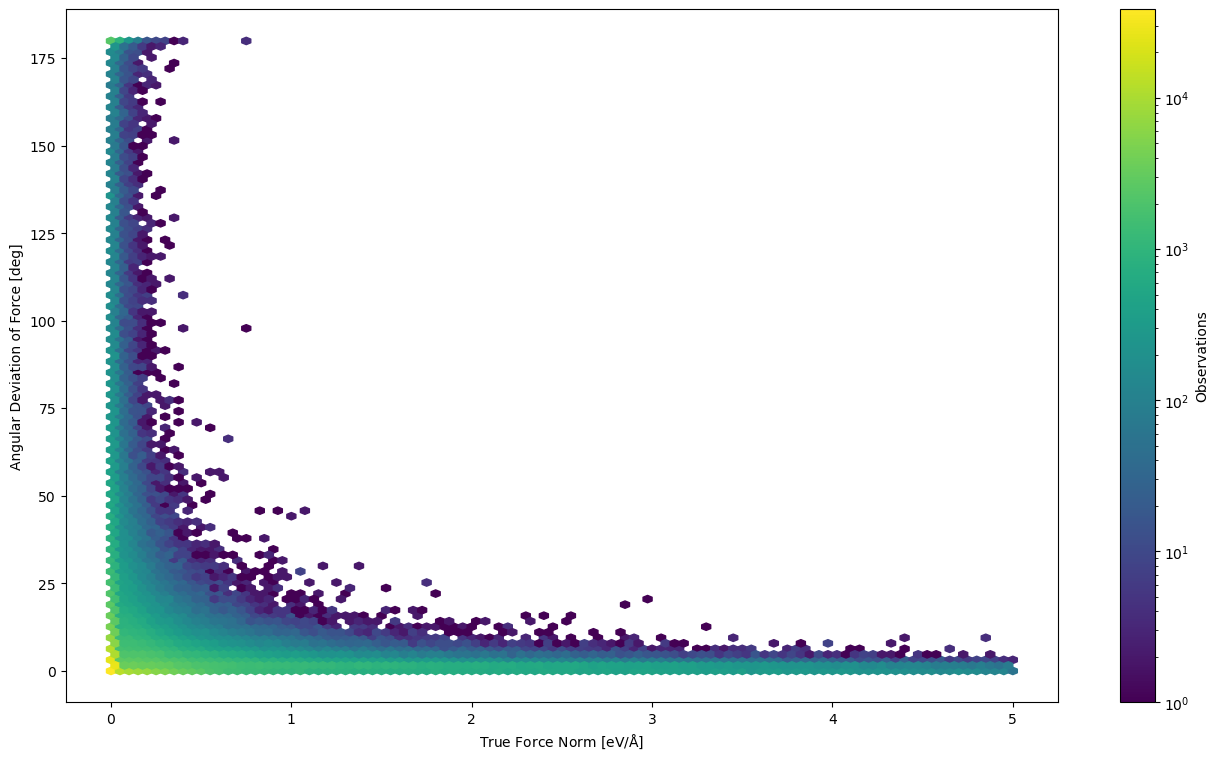

In [205]:
jpot.plot.force_angle_norm_scatter()